In [1]:
# Goals of project :
# - Predict exam_score using regression algorithm.
# - Predict english_level using classification algorithm

In [2]:
# Import Needed Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Preparing The data

In [4]:
std = pd.read_csv('student_grades_english.csv')

In [5]:
import random
options = ['yes','no']
std['daily_practise'] = [random.choice(options) for _ in range(len(std))] # Adding new row of daily_practise

In [22]:
std.rename(
    columns={
        'english_level':'daily_practise',
        'daily_practise':'english_level'
    },inplace=True)
#std['english_level'] , std['daily_practise'] = std['daily_practise'] , std['english_level']

In [23]:
# EDA

In [35]:
std.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [36]:
std.head(3)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,daily_practise,english_level
0,S001,8.0,8.8,72.1,45,30.2,yes,intermediate
1,S002,1.3,8.6,60.7,55,25.0,yes,expert
2,S003,4.0,8.2,73.7,86,35.8,no,intermediate


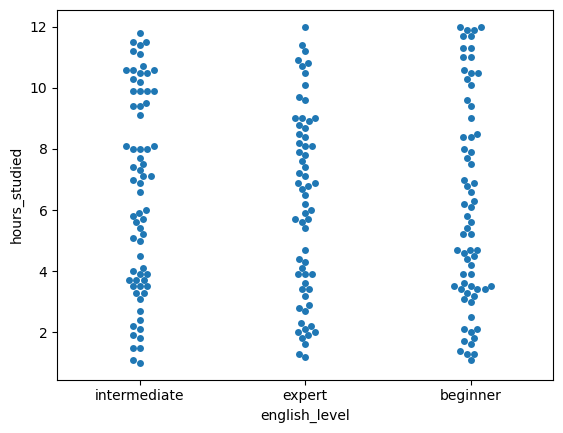

In [69]:
sns.swarmplot(std,x='english_level',y='hours_studied');

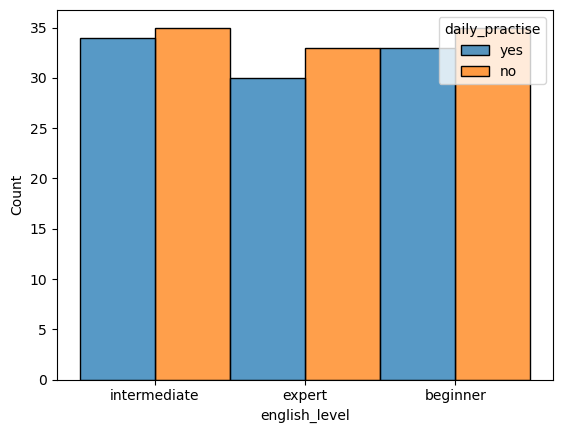

In [32]:
sns.histplot(data=std,x='english_level',hue='daily_practise',multiple='dodge');

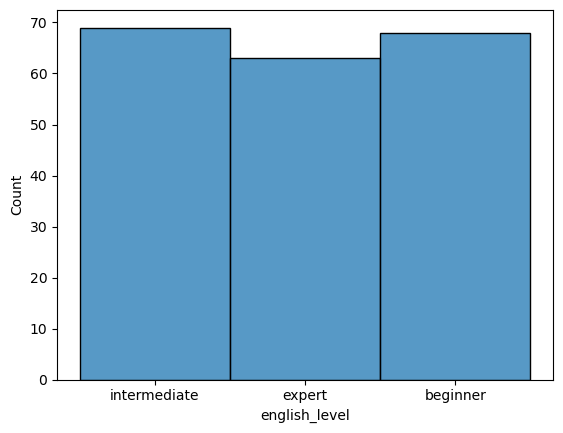

In [33]:
sns.histplot(data=std,x='english_level',multiple='dodge');

<Axes: xlabel='english_level', ylabel='count'>

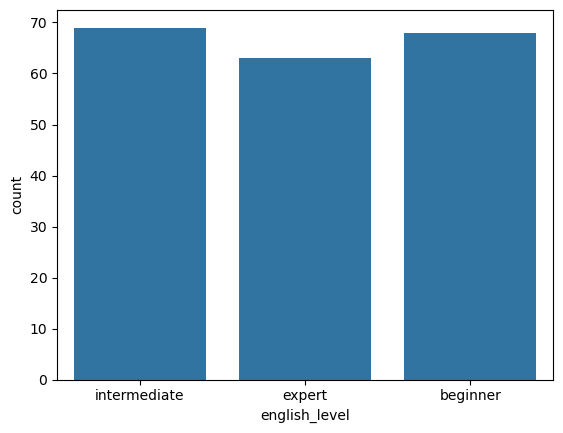

In [60]:
sns.countplot(data=std,x='english_level')

In [72]:
# Regression part

In [74]:
            # Encode Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
std['student_id'] = le.fit_transform(std['student_id'])
std['english_level'] = le.fit_transform(std['english_level'])
std['daily_practise'] = le.fit_transform(std['daily_practise'])

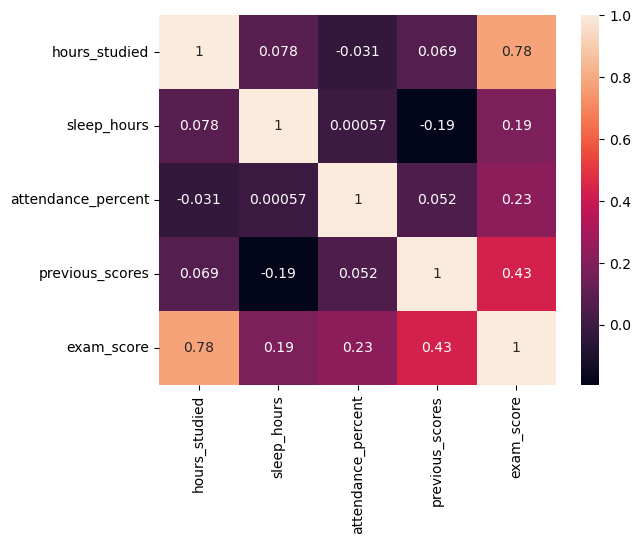

In [98]:
sns.heatmap(std.corr(),annot=True);

In [101]:
#std = std.drop("student_id",axis=1);
reg_x = std.drop('exam_score',axis=1)
reg_y = std['exam_score']

In [127]:
    #Split data
from sklearn.model_selection import train_test_split
reg_x_train , reg_x_test , reg_y_train , reg_y_test = train_test_split(reg_x,reg_y,test_size=0.05,random_state=23)

In [128]:
    #Train model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(reg_x_train,reg_y_train)

LinearRegression()

In [129]:
p = lm.predict(reg_x_test)
rv = np.array(reg_y_test)

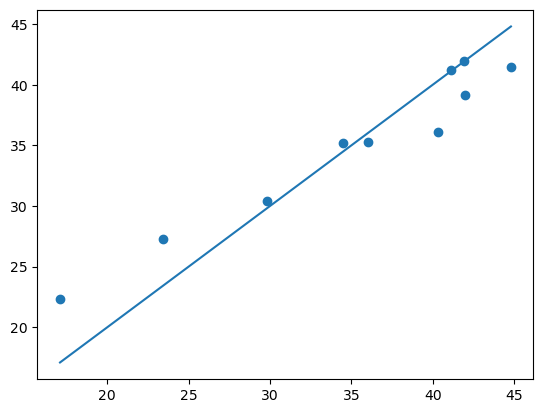

In [130]:
plt.scatter(rv,p)
plt.plot(
    [reg_y_test.min(),reg_y_test.max()],
    [reg_y_test.min(),reg_y_test.max()]
)

In [131]:
    # Evaluate Accurancy
from sklearn import metrics as mt
print(
    "Mean Absolute : ",mt.mean_absolute_error(rv,p), 
    "Mean Squared : ",mt.mean_squared_error(rv,p), 
    "Root Mean Absolute : ",mt.root_mean_squared_error(rv,p), 
    "R^2 score : : ",mt.r2_score(rv,p), 
)

Mean Absolute :  2.173145232758361 Mean Squared :  8.105083944154064 Root Mean Absolute :  2.8469429119942085 R^2 score : :  0.8906386884853505


In [145]:
def PredictExamScore(InputedData={'hours_studied':0,'sleep_hours':0,'attendance_percent':0,'previous_scores':0}) :
    PredictedDataFrame = pd.DataFrame(data=[InputedData])
    Prediction = lm.predict(PredictedDataFrame)
    return round(Prediction[0],1)

In [151]:
print(PredictExamScore(InputedData={'hours_studied':10.9,'sleep_hours':5.3,'attendance_percent':87.7,'previous_scores':88}))

44.7


In [140]:
reg_x_test # 10.9	5.3	87.7	88

,hours_studied,sleep_hours,attendance_percent,previous_scores
72,10.6,7.3,70.8,74
30,9.9,4.4,55.3,67
188,3.1,8.7,68.9,49
77,6.0,6.8,84.8,75
14,8.1,8.8,60.0,90
119,2.7,8.6,77.0,66
97,6.8,4.0,58.3,95
19,1.1,5.5,53.6,65
198,12.0,7.3,50.5,58
174,9.9,5.8,63.5,90


In [ ]:
				40.3
